In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
df1 = pd.read_csv("spotify dataset.csv")
df1.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

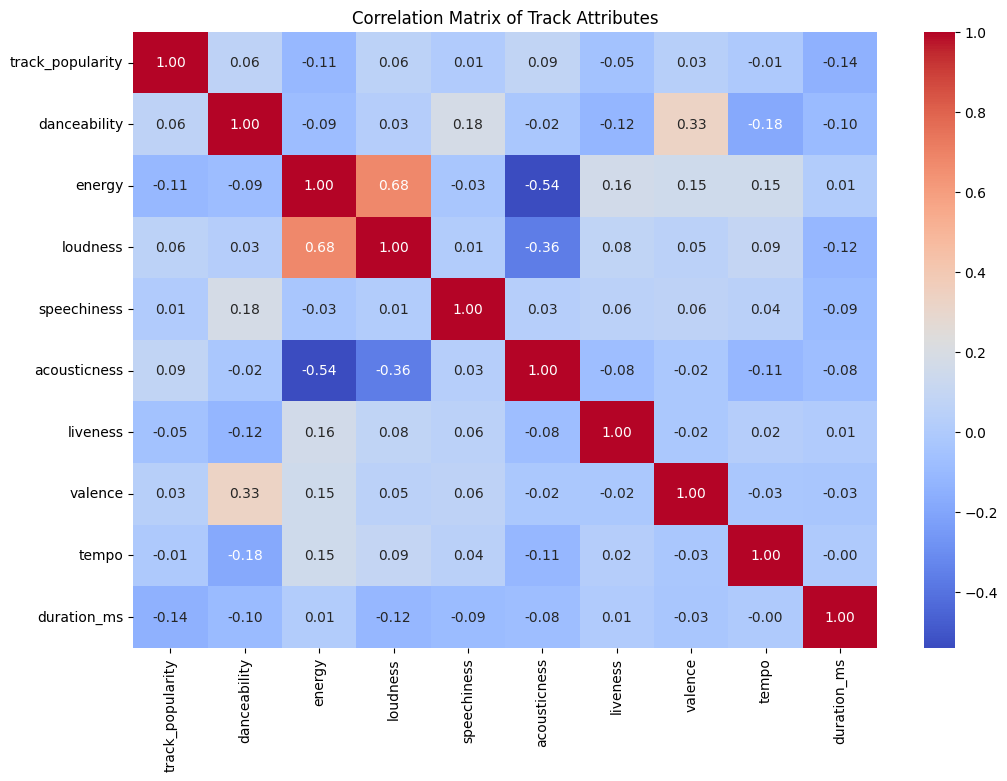

In [ ]:
numeric_cols = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']
df2 = df1[numeric_cols]

correlation_matrix = df2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Track Attributes')
plt.show()

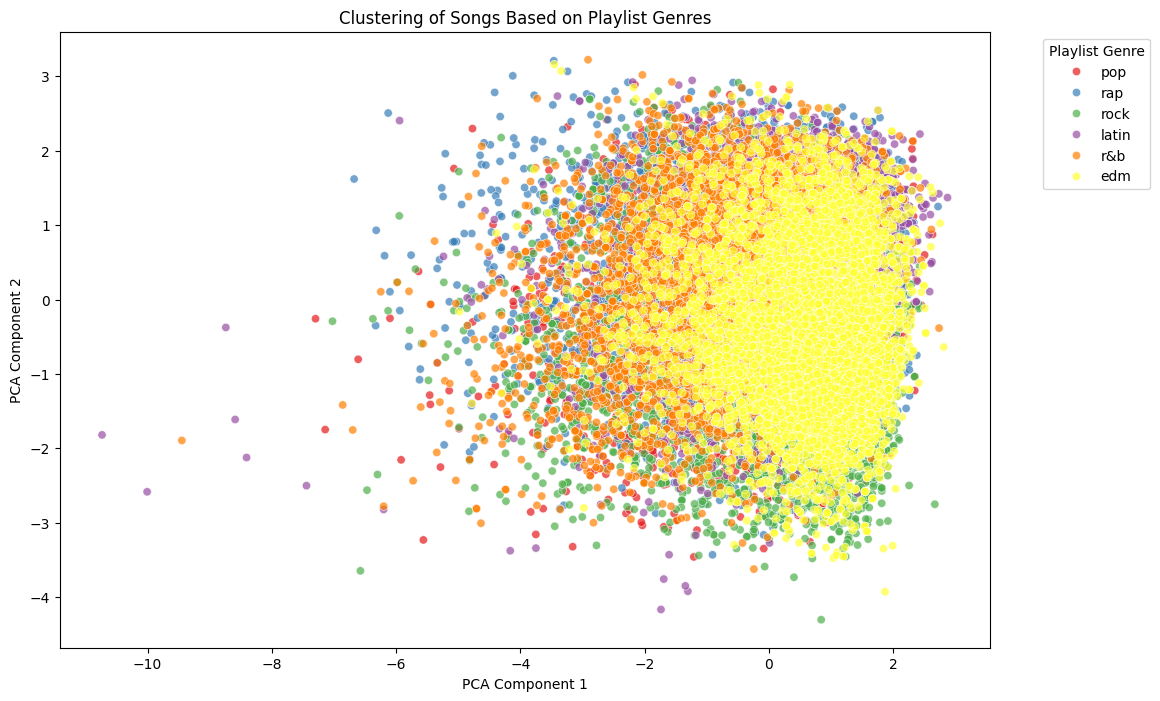

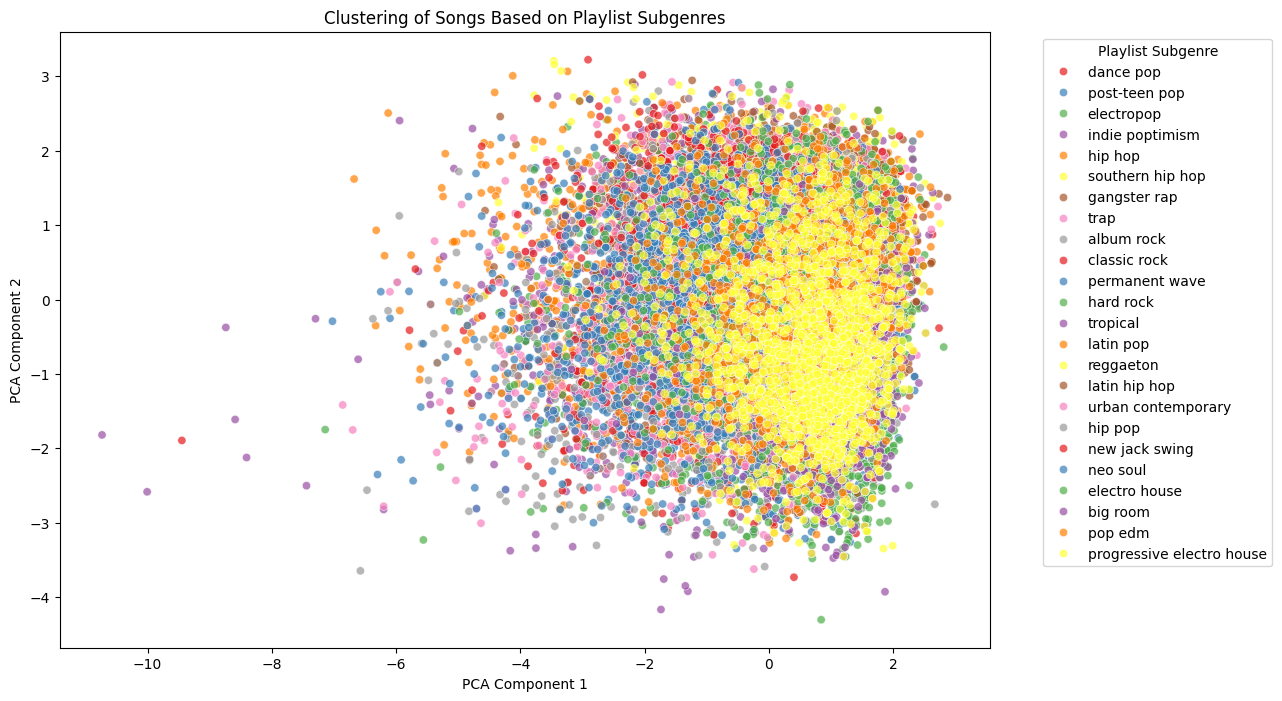

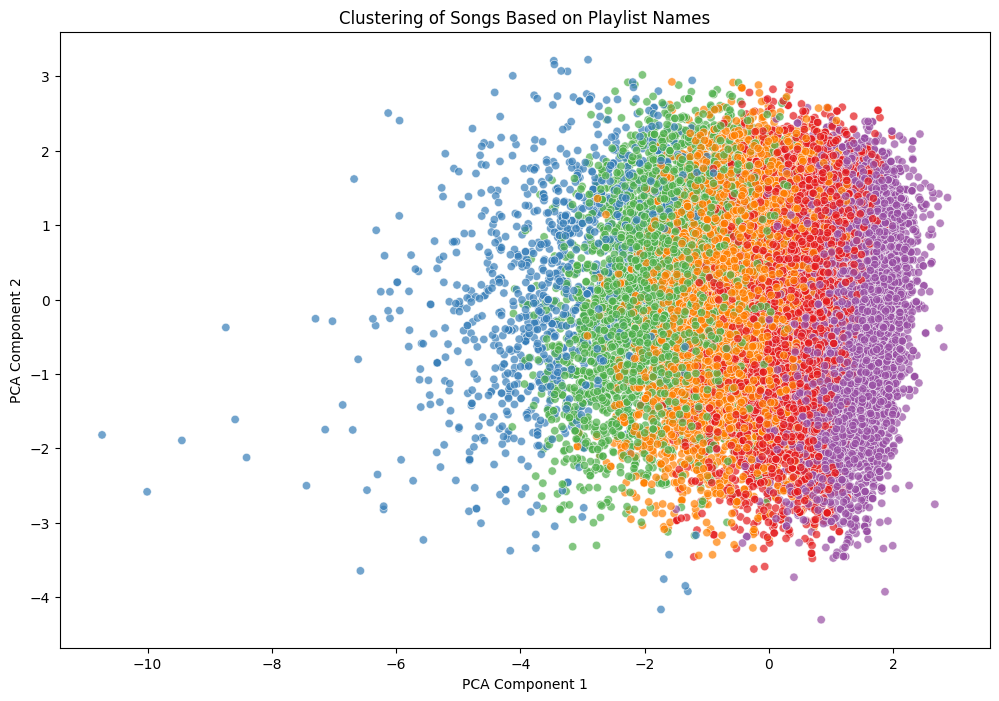

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df1['cluster'] = kmeans.fit_predict(df1[['danceability', 'energy', 'loudness', 'valence']])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1[['danceability', 'energy', 'loudness', 'valence']])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df1['PCA1'] = pca_result[:, 0]
df1['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='playlist_genre', data=df1, palette='Set1', alpha=0.7)
plt.title('Clustering of Songs Based on Playlist Genres')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Playlist Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='playlist_subgenre', data=df1, palette='Set1', alpha=0.7)
plt.title('Clustering of Songs Based on Playlist Subgenres')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Playlist Subgenre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df1, palette='Set1', alpha=0.7)
plt.title('Clustering of Songs Based on Playlist Names')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend([],[], frameon=False)
plt.grid(False)
plt.show()


In [ ]:
df2 = df2.dropna()

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df2)
df_scaled = pd.DataFrame(scaled_features, columns=numeric_cols)

In [ ]:
knn = NearestNeighbors(n_neighbors=100, metric='euclidean')
knn.fit(df_scaled)

NearestNeighbors(metric='euclidean', n_neighbors=100)

In [ ]:
def recommend_songs_by_name(song_name, df, n_recommendations=5):
    song_name_lower = song_name.lower()
    try:
        song_index = df[df['track_name'].str.lower() == song_name_lower].index[0]
    except IndexError:
        return f'Song "{song_name}" not found in the dataset.'

    genre_filter = df.iloc[song_index]['playlist_genre']
    subgenre_filter = df.iloc[song_index]['playlist_subgenre']

    input_song_features = pd.DataFrame(df_scaled.iloc[song_index]).T
    distances, indices = knn.kneighbors(input_song_features, n_neighbors=100)

    recommended_songs = []

    for i in indices[0]:
        if (df.iloc[i]['playlist_genre'] == genre_filter and
                df.iloc[i]['playlist_subgenre'] == subgenre_filter and
                df.iloc[i]['track_name'].lower() != song_name_lower):
            recommended_songs.append(i)
        if len(recommended_songs) >= n_recommendations:
            break

    if len(recommended_songs) < n_recommendations:
        for i in indices[0]:
            if (df.iloc[i]['playlist_genre'] == genre_filter and
                    df.iloc[i]['track_name'].lower() != song_name_lower):
                recommended_songs.append(i)
            if len(recommended_songs) >= n_recommendations:
                break

    if len(recommended_songs) < n_recommendations:
        for i in indices[0]:
            if df.iloc[i]['track_name'] != song_name:
                recommended_songs.append(i)
            if len(recommended_songs) >= n_recommendations:
                break

    recommendations = df.iloc[recommended_songs]
    return recommendations[['track_name', 'track_artist', 'playlist_name', 'playlist_genre', 'playlist_subgenre']]

In [ ]:
input_song_name = input("Enter the song name: ").lower()
recommended_songs = recommend_songs_by_name(input_song_name, df1)

if isinstance(recommended_songs, pd.DataFrame) and not recommended_songs.empty:
    song_index = df1[df1['track_name'].str.lower() == input_song_name].index[0]
    original_song_name = df1.iloc[song_index]['track_name']
    print(f"\nRecommendations for '{original_song_name}':")
    display(recommended_songs.style.set_table_attributes('style="width: 80%; margin: auto;"').set_caption('Recommended Songs'))
else:
    print(recommended_songs)

Enter the song name: uptown funk

Recommendations for 'Uptown Funk':


,track_name,track_artist,playlist_name,playlist_genre,playlist_subgenre
1094,Bags,Clairo,Ultimate Indie Presents... Best Indie Tracks of the 2010s,pop,dance pop
604,Get Lucky (feat. Pharrell Williams & Nile Rodgers) - Radio Edit,Daft Punk,Dance Pop Tunes,pop,dance pop
1226,Pumped Up Kicks,Foster The People,Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s,pop,dance pop
601,Praise You - Purple Disco Machine Remix,Fatboy Slim,Dance Pop Tunes,pop,dance pop
4486,Tongues,Joywave,Indie Poptimism,pop,indie poptimism
